In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fear_data=pd.read_csv(r"D:\Downloads\fear_greed_index.csv")
historical_data=pd.read_csv(r"D:\Downloads\historical_data.csv")

In [3]:
fear_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
fear_data.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [6]:
historical_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [7]:
#Data set is clean can proceed with the bivariate analysis to analyse the relationship between two data sets

In [8]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
fear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
historical_data['date'] = pd.to_datetime(historical_data['Timestamp IST'],dayfirst=True).dt.normalize()
fear_data['date']=pd.to_datetime(fear_data['date'])

In [11]:
#now merging the data so that we can know some relations thorugh heat map 

In [12]:
merged_data=pd.merge(historical_data,fear_data,on='date',how='left')

In [13]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [14]:
#now after merging we need to take care about the things values that are realatable to fear but before that we need to map fear 

In [15]:
print(merged_data['classification'].unique())

['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' nan]


In [16]:
mapping = {
    'Extreme Fear': 1,
    'Fear': 2,
    'Neutral': 3,
    'Greed': 4,
    'Extreme Greed': 5
}
merged_data = merged_data.dropna(subset=['classification'])
merged_data['sentimental_score']=merged_data['classification'].map(mapping)

In [17]:
#lets define few columns to analyse 

In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Account            211218 non-null  object        
 1   Coin               211218 non-null  object        
 2   Execution Price    211218 non-null  float64       
 3   Size Tokens        211218 non-null  float64       
 4   Size USD           211218 non-null  float64       
 5   Side               211218 non-null  object        
 6   Timestamp IST      211218 non-null  object        
 7   Start Position     211218 non-null  float64       
 8   Direction          211218 non-null  object        
 9   Closed PnL         211218 non-null  float64       
 10  Transaction Hash   211218 non-null  object        
 11  Order ID           211218 non-null  int64         
 12  Crossed            211218 non-null  bool          
 13  Fee                211218 non-null  float64      

In [19]:
cols_to_analyse=['value', 'Closed PnL', 'Size USD', 'Fee','sentimental_score']

In [20]:
corr_matrix=merged_data[cols_to_analyse].corr()

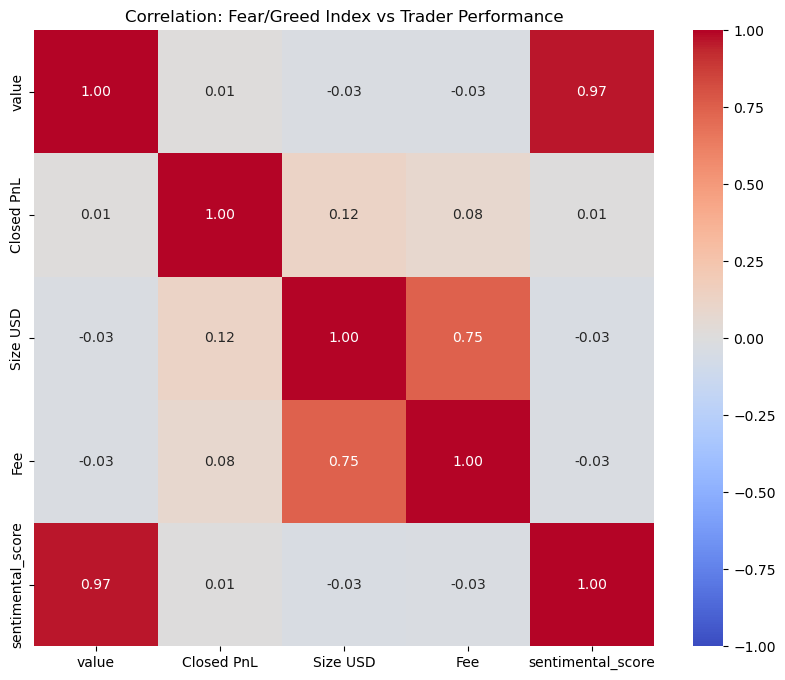

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmax=1,vmin=-1,fmt=".2f")
plt.title("Correlation: Fear/Greed Index vs Trader Performance")
plt.show()

In [22]:
#From the above heat map it is almost certain that value and sentimental score resembles the same one in text format and other in numrical so we prefer numerical data for our analysis

In [26]:
#From the heatmap we found that pnl and value are not that related so it indicated we are a normal trader but may be extremes are diff and cancel each other 
#1. so we need to check it with bar chart

In [27]:
analysis=merged_data.groupby('classification')['Closed PnL'].agg(['mean','count'])

In [28]:
order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
analysis = analysis.reindex(order)

In [29]:
print("--- Average Profit per Sentiment ---")
print(analysis)

--- Average Profit per Sentiment ---
                     mean  count
classification                  
Extreme Fear    34.537862  21400
Fear            54.290400  61837
Neutral         34.307718  37686
Greed           42.743559  50303
Extreme Greed   67.892861  39992


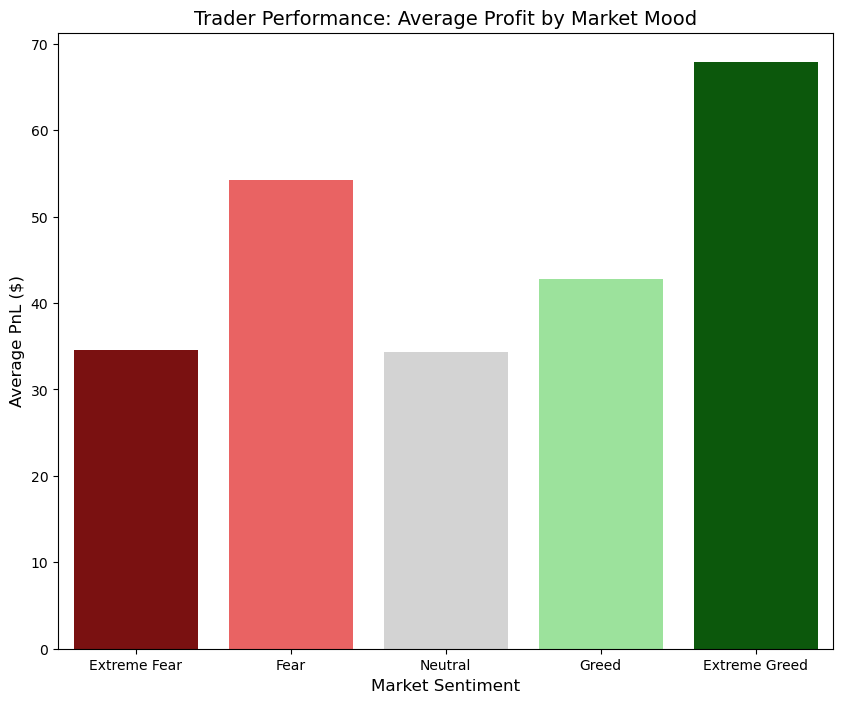

In [33]:
plt.figure(figsize=(10,8))
colours=['#8b0000', '#ff4d4d', '#d3d3d3', '#90ee90', '#006400']
sns.barplot(x=analysis.index,y=analysis['mean'],hue=analysis.index,palette=colours)

plt.title("Trader Performance: Average Profit by Market Mood", fontsize=14)
plt.ylabel("Average PnL ($)", fontsize=12)
plt.xlabel("Market Sentiment", fontsize=12)
plt.show()

In [34]:
# From the above we can say that he is a bearish trader  clearly getting huge profits when the market has extreme greed and also in Fear condition makes u a bearish trader there 

In [35]:
# we need to confirm that whether we are buying or selling at winning and losing positions 

In [37]:
deep_dive = merged_data.pivot_table(
    index='classification',
    columns='Side',
    values='Closed PnL',
    aggfunc='mean'
).reindex(['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])

In [38]:
print(deep_dive)

Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Fear            63.927104   45.049641
Neutral         29.227429   39.456408
Greed           25.002302   59.691091
Extreme Greed   10.498927  114.584643


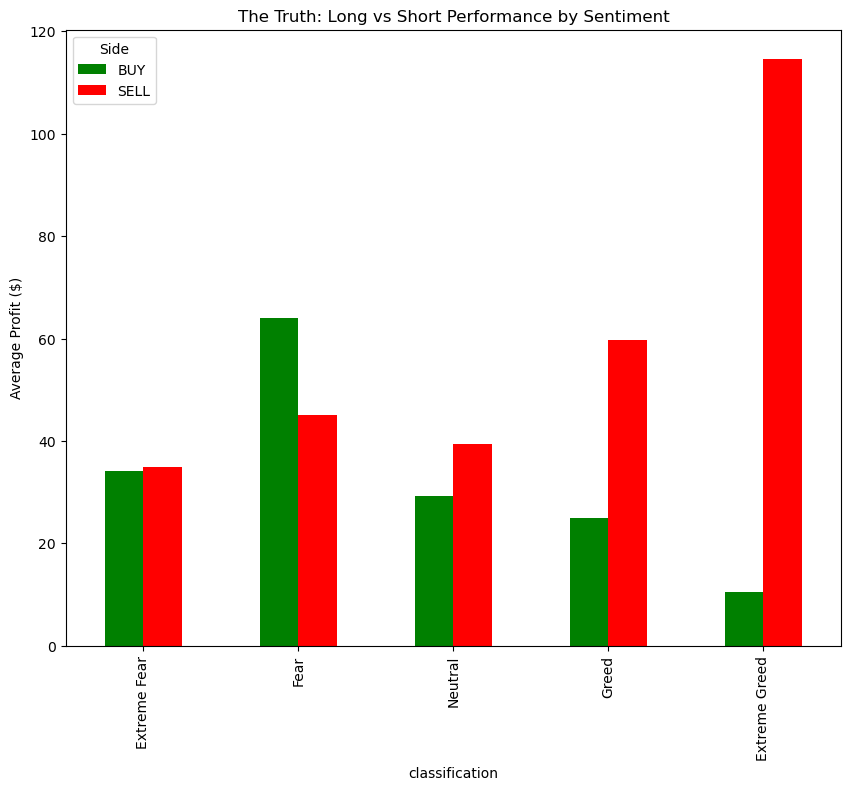

In [42]:
deep_dive.plot(kind='bar',color=['green','red'],figsize=(10,8))
plt.title("The Truth: Long vs Short Performance by Sentiment")
plt.ylabel("Average Profit ($)")
plt.show()

In [43]:
#from the above information he is a good short seller when extremely greedy  but 
#losses money by buying when the market is greedy and also wins money by buying in the market is in fear
#and camparityively for all the others 

Rules to follow inorder to be profitable:

Rule 1: If Sentiment > 75 (Extreme Greed) → Hard Pivot to Short. Disable Long signals.

Rule 2: If Sentiment is 25-45 (Fear) → Prioritize Longs.

Rule 3: If Sentiment is 45-55 (Neutral) → Reduce Position Size. Cut risk by 50% to preserve capital.